In [73]:
#Prueba de Nominatim para ProyectoCiclsita
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import requests
# Uso de API's
# -----------------------------------------------------------------------
import requests

# Para incluir una barra de proceso en for loops
# -----------------------------------------------------------------------
from tqdm import tqdm


# Para introducir tiempo entre las llamadas
# -----------------------------------------------------------------------
from time import sleep


# Para trabajar con archivos dotenv y los tokens
# -----------------------------------------------------------------------

import os
import dotenv
dotenv.load_dotenv()

from geopy.geocoders import Nominatim
from tqdm import tqdm
import pandas as pd
from time import sleep





In [74]:
lista_puertos=["Col d'Aubisque","Col-du-Tourmalet","Le-Hautacam", "Luz-Ardiden", "Col-du-Galibier"]

In [75]:
def obtener_df_coordenadas(lista_puertos):
    """
    Obtiene las coordenadas geográficas (latitud y longitud) de una lista de municipios y las devuelve en un DataFrame.

    Parámetros:
    lista_municipios (list): Lista de nombres de municipios.

    Retorna:
    pandas.DataFrame: DataFrame con las columnas 'Puerto', 'Latitud' y 'Longitud'.
    """
    # Inicializar el geolocalizador Nominatim con un user_agent personalizado
    geolocator = Nominatim(user_agent="SetMagic Productions")  # Usamos Nominatim como geolocalizador
    resultados = []  # Lista para almacenar los resultados

    # Iteramos sobre la lista de municipios con una barra de progreso
    for puerto in lista_puertos:
        try:
            # Intentamos obtener la ubicación geográfica del puerto
            location = geolocator.geocode(puerto)
            if location:
                # Si se encuentra la ubicación, añadimos los datos a la lista de resultados
                resultados.append((puerto, location.latitude, location.longitude))
            else:
                # Si no se encuentra la ubicación, añadimos None para latitud y longitud
                resultados.append((puerto, None, None))

            # Pausa de 1 segundo para respetar los términos de uso del servicio y evitar sobrecargas
            sleep(1)

        except Exception as e:
            # Capturamos cualquier error y lo mostramos por pantalla
            print(f"Error al obtener las coordenadas para {puerto}: {e}")
            # Añadimos el puerto con coordenadas None en caso de error
            resultados.append((puerto, None, None))

    # Crear un DataFrame con los resultados obtenidos
    df_resultados = pd.DataFrame(resultados, columns=["Puerto", "Latitud", "Longitud"])

    return df_resultados


In [76]:
df_coordenadas_puertos=obtener_df_coordenadas(lista_puertos)

In [77]:
df_coordenadas_puertos


,Puerto,Latitud,Longitud
0,Col d'Aubisque,42.976575,-0.339792
1,Col-du-Tourmalet,42.908375,0.145268
2,Le-Hautacam,42.972185,-0.007241
3,Luz-Ardiden,42.885087,-0.058821
4,Col-du-Galibier,45.064165,6.407878


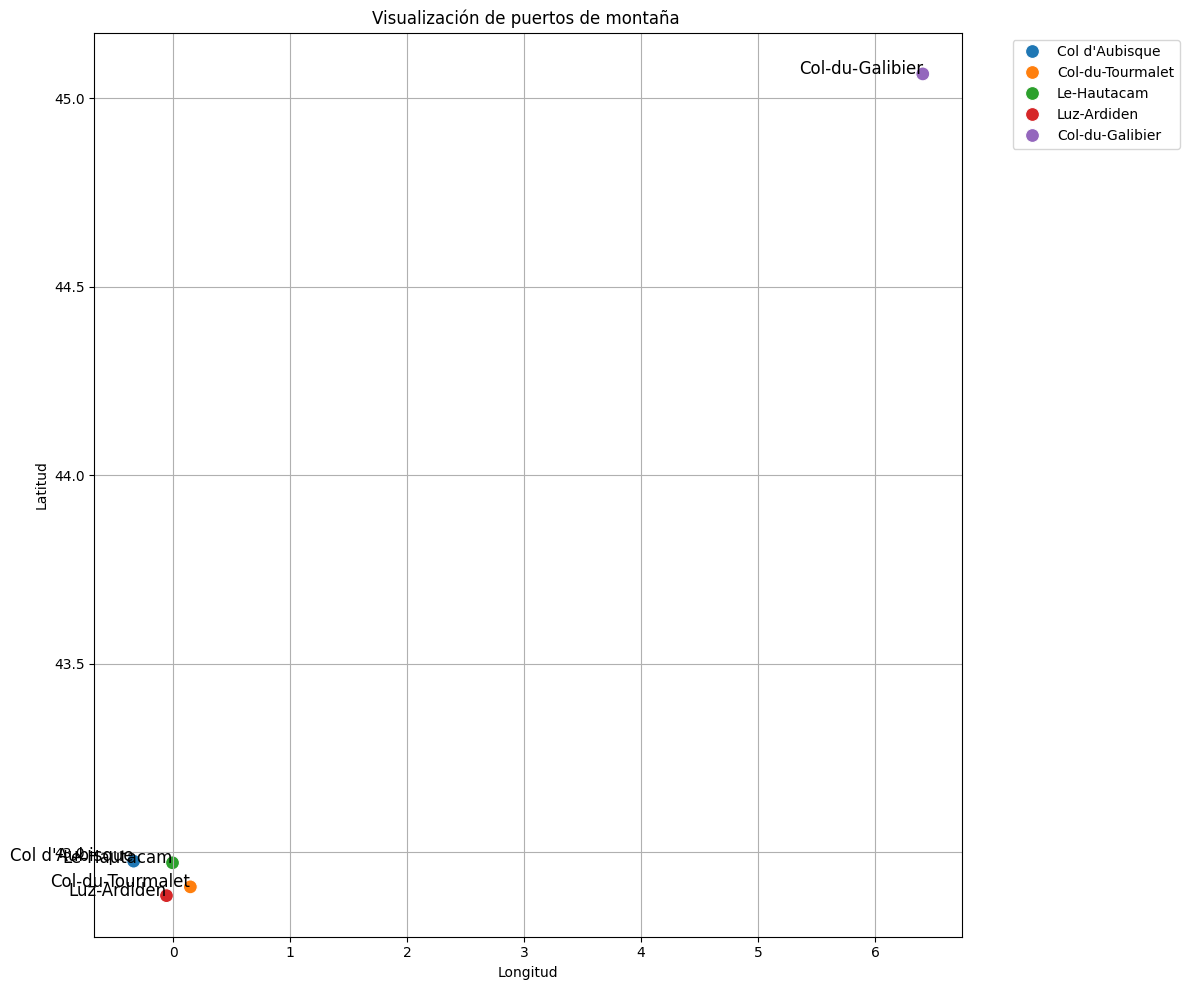

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


data = pd.DataFrame({
    'Puerto': ["Col d'Aubisque", "Col-du-Tourmalet", "Le-Hautacam", "Luz-Ardiden", "Col-du-Galibier"],
    'Latitud': [42.976575, 42.908375, 42.972185, 42.885087, 45.064165],
    'Longitud': [-0.339792, 0.145268, -0.007241, -0.058821, 6.407878]
})


plt.figure(figsize=(12, 10))
sns.scatterplot(data=data, x="Longitud", y="Latitud", hue="Puerto", s=100)


for i, row in data.iterrows():
    plt.text(row['Longitud'], row['Latitud'], row['Puerto'], fontsize=12, ha='right')


plt.title('Visualización de puertos de montaña ')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
from geopy.distance import geodesic

# Definir la función de suma de distancias mínimas
def suma_distancias_minimas(puntos):
    """
    Calcula la suma de las distancias mínimas entre un conjunto de puntos.
    
    Parámetros:
    puntos (list of tuple): Lista de tuplas, donde cada tupla contiene latitud y longitud de un punto.
    
    Retorna:
    float: La suma de las distancias mínimas entre los puntos.
    """
    # Verificar que haya al menos dos puntos
    if len(puntos) < 2:
        return 0.0
    
    # Lista para marcar los puntos visitados
    visitado = [False] * len(puntos)
    visitado[0] = True  # Empezamos desde el primer punto
    suma_distancias = 0.0
    actual = puntos[0]
    
    for _ in range(1, len(puntos)):
        distancia_minima = float("inf")
        siguiente_punto = None
        
        # Encontrar el punto no visitado más cercano
        for i, punto in enumerate(puntos):
            if not visitado[i]:  # Solo considerar puntos no visitados
                distancia = geodesic(actual, punto).kilometers
                if distancia < distancia_minima:
                    distancia_minima = distancia
                    siguiente_punto = i
        
        # Sumar la distancia mínima al siguiente punto
        suma_distancias += distancia_minima
        actual = puntos[siguiente_punto]
        visitado[siguiente_punto] = True
    
    return suma_distancias

# Definir los puntos del DataFrame en una lista de tuplas (latitud, longitud)
puntos_df = [
    (42.976575, -0.339792),  # Col d'Aubisque
    (42.908375, 0.145268),   # Col-du-Tourmalet
    (42.972185, -0.007241),  # Le-Hautacam
    (42.885087, -0.058821),  # Luz-Ardiden
    (45.064165, 6.407878)    # Col-du-Galibier
]

# Calcular la suma de las distancias mínimas entre los puntos
distancia_total_df = suma_distancias_minimas(puntos_df)
distancia_total_df


606.3489981178691